<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Linear_Regression_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#**Data Loading**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
data = pd.read_csv('/content/drive/MyDrive/Datasets/Andrew ML/ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

In [ ]:
data.describe()

# **Data Visulization** 

In [ ]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

# **Implementing Simple Linear Regression**

In [10]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [12]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [13]:
X.shape, theta.shape, y.shape


((97, 2), (1, 2), (97, 1))

In [14]:
computeCost(X, y, theta)

32.072733877455676

In [15]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [16]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
computeCost(X, y, g)


4.515955503078914

# **Viewing The Results**

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

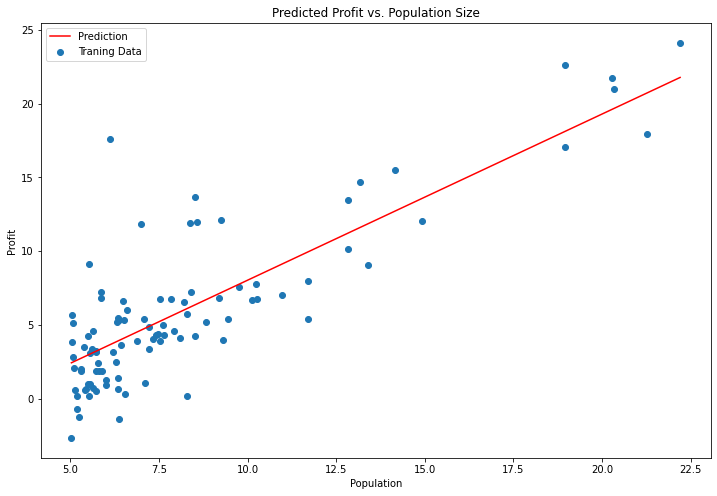

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

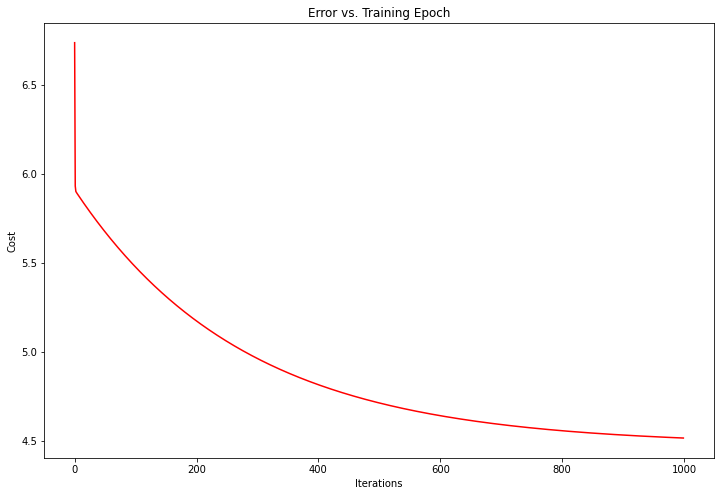

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')